In [1]:
import os
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Chemin vers la racine du projet
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))  # remonte d'un dossier
data_path = os.path.join(project_root, 'data')

print("Chemin vers data :", data_path)


Chemin vers data : /home/jupyter/Fatma_Aziz/movie_recommender/data


In [2]:
# Charger train, test et movies
train_df = pd.read_csv(os.path.join(data_path, 'train_ratings.csv'))
test_df = pd.read_csv(os.path.join(data_path, 'test_ratings.csv'))
df_movies = pd.read_csv(os.path.join(data_path, 'movies.csv'))

# Vérifier
print("Train shape :", train_df.shape)
print("Test shape  :", test_df.shape)
print("Movies shape:", df_movies.shape)


Train shape : (84271, 6)
Test shape  : (21068, 6)
Movies shape: (10329, 5)


In [3]:
# chargemnt des encoder et décoder 
import pickle

with open(os.path.join(data_path, 'user_encoder.pkl'), 'rb') as f:
    user_encoder = pickle.load(f)

with open(os.path.join(data_path, 'movie_encoder.pkl'), 'rb') as f:
    movie_encoder = pickle.load(f)


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LabelEncoder from version 1.7.2 when using version 1.4.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [4]:

# user_idx et movie_idx sont déjà créés
user_movie_matrix = train_df.pivot(index='user_idx', columns='movie_idx', values='rating')

# Affichage rapide
print(user_movie_matrix.head())

movie_idx  0      1      2      3      4      5      6      7      8      \
user_idx                                                                   
0            NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
1            5.0    NaN    2.0    NaN    3.0    NaN    NaN    NaN    NaN   
2            NaN    NaN    NaN    NaN    3.0    NaN    NaN    NaN    NaN   
3            NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
4            4.0    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

movie_idx  9      ...  10315  10316  10317  10318  10319  10320  10321  10322  \
user_idx          ...                                                           
0            NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
1            NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2            NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
3            NaN  ...    NaN    NaN    NaN    NaN    NaN    Na

In [5]:
# Remplacer les NaN par 0 pour calculer la similarité
user_movie_matrix_filled = user_movie_matrix.fillna(0)

# Similarité entre utilisateurs
user_similarity = cosine_similarity(user_movie_matrix_filled)

# Convertir en DataFrame pour plus de clarté
user_similarity_df = pd.DataFrame(user_similarity, 
                                  index=user_movie_matrix.index, 
                                  columns=user_movie_matrix.index)

In [6]:
user_movie_matrix_filled.head(100)

movie_idx,0,1,2,3,4,5,6,7,8,9,...,10315,10316,10317,10318,10319,10320,10321,10322,10323,10324
user_idx,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5.0,0.0,2.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.0,0.0,4.0,0.0,3.0,4.0,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
96,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
97,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
# Moyenne des ratings par film
mean_ratings = user_movie_matrix.mean(axis=0)  # moyenne colonne par colonne (chaque film)

# Trier par ordre décroissant
mean_ratings_sorted = mean_ratings.sort_values(ascending=False)

# Afficher les 10 premiers
print(mean_ratings_sorted.head(10))


movie_idx
1632     5.0
10118    5.0
7362     5.0
9426     5.0
810      5.0
9440     5.0
7225     5.0
6895     5.0
6890     5.0
6783     5.0
dtype: float64


# Création et test des modèles 

In [8]:
from surprise import Dataset, Reader, SVD
from surprise.model_selection import train_test_split
from surprise import accuracy
from surprise import Trainset
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
# Définir le format des données
reader = Reader(rating_scale=(train_df['rating'].min(), train_df['rating'].max()))

# Charger directement le trainset
train_data = Dataset.load_from_df(train_df[['user_idx', 'movie_idx', 'rating']], reader)
trainset = train_data.build_full_trainset()  # Utilise tout train_df

# Charger directement le testset (test_df)
testset = list(zip(test_df['user_idx'], test_df['movie_idx'], test_df['rating']))

In [14]:
# Créer et entraîner le modèle SVD 
model_svd = SVD()
model_svd.fit(trainset)

# Prédictions sur test set
predictions = model_svd.test(testset)

# RMSE
rmse = accuracy.rmse(predictions)
print("RMSE sur le test set:", rmse)

RMSE: 0.8689
RMSE sur le test set: 0.8688819845195906


In [15]:
# Afficher les 10 premières prédictions et les vraies valeurs
print("user_idx | movie_idx | rating réel | rating prédit")
for pred in predictions[:10]:
    print(f"{pred.uid}        {pred.iid}         {pred.r_ui:.2f}        {pred.est:.2f}")


user_idx | movie_idx | rating réel | rating prédit
667        9012         3.00        2.79
158        4314         1.00        2.83
109        523         5.00        4.11
388        315         3.00        3.39
309        1889         3.00        2.55
457        3336         3.00        3.52
527        745         4.50        3.79
660        6         4.00        3.20
65        2388         4.00        3.06
6        2143         5.00        3.17


In [21]:
# Matrice prédite
n_users = train_df['user_idx'].nunique()
n_movies = train_df['movie_idx'].nunique()

pred_matrix = np.zeros((n_users, n_movies))

for uid in range(n_users):
    for iid in range(n_movies):
        pred_matrix[uid, iid] = model_svd.predict(uid, iid).est
        
pred_df = pd.DataFrame(pred_matrix, 
                       index=[f"User {uid}" for uid in range(n_users)],
                       columns=df_movies['title'].values[:n_movies])  # limiter au nombre de films entraînés

# Afficher les 10 premières lignes et colonnes
print(pred_df.iloc[:10, :10])

        Li'l Quinquin (    )  Pablo (2012)  The Big Broadcast of 1936 (1935)  \
User 0              3.726625      3.188001                          2.824215   
User 1              4.428146      3.642250                          3.233053   
User 2              4.059660      3.494987                          3.188961   
User 3              4.119261      3.695175                          3.540691   
User 4              3.699631      3.137795                          2.996131   
User 5              4.308984      3.682200                          3.790106   
User 6              3.997470      3.420500                          3.149858   
User 7              4.429881      3.678132                          3.822445   
User 8              3.193017      2.545547                          2.517497   
User 9              3.621986      3.187951                          3.182263   

        Round Trip to Heaven (1992)  The 50 Year Argument (2014)  \
User 0                     2.790390                

In [22]:
# recommandation for users filtrage collaboratif basé sur un modèle (Model-Based CF)
def recommand_movie_to_user(user_id, top_n=5):
    # Tous les movie_idx vus par l'utilisateur
    movies_watched = train_df[train_df['user_idx']==user_id]['movie_idx'].tolist()

    # Tous les movie_idx connus par le modèle
    all_movie_idx = list(movie_encoder.transform(movie_encoder.classes_))

    pred_for_user = []

    for movie_idx in all_movie_idx:
        if movie_idx not in movies_watched:
            pred_rating = model_svd.predict(user_id, movie_idx).est
            pred_for_user.append((movie_idx, pred_rating))

    # Trier par note prédite décroissante
    top_recommendations = sorted(pred_for_user, key=lambda x: x[1], reverse=True)[:5]

    # Afficher
    print("Top 5 recommandations pour user", user_id)
    for movie_idx, rating in top_recommendations:
        movie_id = movie_encoder.inverse_transform([movie_idx])[0]
        title = df_movies[df_movies['movieId']==movie_id]['title'].values[0]
        print(f"{title} - predicted rating: {rating:.2f}")
        
    return sorted(pred_for_user, key=lambda x: x[1], reverse=True)[:top_n]


In [23]:
recommand_movie_to_user(0)

Top 5 recommandations pour user 0
Requiem for a Dream (2000) - predicted rating: 4.33
North by Northwest (1959) - predicted rating: 4.21
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950) - predicted rating: 4.20
Godfather, The (1972) - predicted rating: 4.19
Delicatessen (1991) - predicted rating: 4.19


[(3108, 4.327339474352722),
 (729, 4.20819945450619),
 (743, 4.199215863406515),
 (695, 4.189863102467872),
 (940, 4.189683535955173)]

In [24]:
recommand_movie_to_user(50)

Top 5 recommandations pour user 50
Good Will Hunting (1997) - predicted rating: 4.81
Citizen Kane (1941) - predicted rating: 4.73
Monty Python and the Holy Grail (1975) - predicted rating: 4.72
Amores Perros (Love's a Bitch) (2000) - predicted rating: 4.72
Chinatown (1974) - predicted rating: 4.72


[(1360, 4.805637002121054),
 (744, 4.730180601579708),
 (922, 4.722970134011359),
 (3329, 4.719635896551988),
 (1011, 4.718311635255757)]

In [25]:
all_user_ids = train_df['user_idx'].unique().tolist()

print(f"Nombre total d'utilisateurs : {len(all_user_ids)}")

Nombre total d'utilisateurs : 668


In [27]:
from sklearn.metrics.pairwise import cosine_similarity
def users_close(user_idx, k=15):
    user_similarity = cosine_similarity(pred_matrix)
    
    user_similarity_df = pd.DataFrame(
        user_similarity,
        index=all_user_ids,
        columns=all_user_ids
    )
    
    closest_users = (
        user_similarity_df[user_idx]
        .sort_values(ascending=False)
        .iloc[1:k+1]   # on enlève l'utilisateur lui-même
    )
    
    return closest_users


In [30]:
users_close(0)

516    0.999335
114    0.999324
329    0.999319
564    0.999308
631    0.999296
212    0.999295
68     0.999288
263    0.999288
155    0.999277
167    0.999272
264    0.999270
152    0.999266
197    0.999264
372    0.999261
106    0.999261
Name: 0, dtype: float64

In [31]:
users_close(50)

409    0.999442
212    0.999435
640    0.999403
329    0.999393
323    0.999387
629    0.999386
44     0.999386
631    0.999375
172    0.999374
309    0.999371
493    0.999370
146    0.999369
114    0.999366
377    0.999366
502    0.999366
Name: 50, dtype: float64

In [22]:
from sklearn.metrics.pairwise import cosine_similarity

# 1. Matrice utilisateur × film
user_movie_matrix = train_df.pivot(
    index='user_idx',
    columns='movie_idx',
    values='rating'
)

# 2. Similarité utilisateur-utilisateur
user_similarity = cosine_similarity(user_movie_matrix.fillna(0))
user_similarity_df = pd.DataFrame(
    user_similarity,
    index=user_movie_matrix.index,
    columns=user_movie_matrix.index
)


In [23]:
user_id = 0
k = 10

# k plus proches voisins
neighbors = (
    user_similarity_df[user_id]
    .sort_values(ascending=False)
    .iloc[1:k+1]
    .index
)


In [24]:
def avg_neighbor_rating(movie_idx, neighbors):
    ratings = user_movie_matrix.loc[neighbors, movie_idx].dropna()
    return ratings.mean() if len(ratings) > 0 else None


In [25]:
# teste pour l'utilisateur 
user_id = all_user_ids[0] 
neighbors = users_close(user_id).index.tolist()
print("Voisins :", neighbors)


Voisins : [416, 537, 402, 612, 156, 54, 218, 82, 478, 123, 369, 510, 647, 499, 461]


In [26]:
user_id = all_user_ids[0]

recommendations = recommand_movie_to_user(user_id)
neighbors = users_close(user_id).index.tolist()

print(f"\n🎬 Recommandations pour l'utilisateur {user_id} :\n")

for movie_idx, pred_rating in recommendations:
    
    avg_neighbors = avg_neighbor_rating(movie_idx, neighbors)

    movie_id = movie_encoder.inverse_transform([movie_idx])[0]
    title = df_movies.loc[df_movies['movieId'] == movie_id, 'title'].values[0]

    print(f"Film : {title}")
    print(f"  ⭐ Note prédite (SVD)      : {pred_rating:.2f}")
    print(f"  👥 Moyenne des voisins    : {avg_neighbors:.2f}" if avg_neighbors is not None else
          "  👥 Moyenne des voisins    : aucune note")
    print("-" * 50)


Top 5 recommandations pour user 142
Usual Suspects, The (1995) - predicted rating: 5.00
Star Wars: Episode IV - A New Hope (1977) - predicted rating: 5.00
Like Water for Chocolate (Como agua para chocolate) (1992) - predicted rating: 5.00
Shawshank Redemption, The (1994) - predicted rating: 5.00
Blade Runner (1982) - predicted rating: 5.00

🎬 Recommandations pour l'utilisateur 142 :

Film : Usual Suspects, The (1995)
  ⭐ Note prédite (SVD)      : 5.00
  👥 Moyenne des voisins    : aucune note
--------------------------------------------------
Film : Star Wars: Episode IV - A New Hope (1977)
  ⭐ Note prédite (SVD)      : 5.00
  👥 Moyenne des voisins    : 4.60
--------------------------------------------------
Film : Like Water for Chocolate (Como agua para chocolate) (1992)
  ⭐ Note prédite (SVD)      : 5.00
  👥 Moyenne des voisins    : 3.00
--------------------------------------------------
Film : Shawshank Redemption, The (1994)
  ⭐ Note prédite (SVD)      : 5.00
  👥 Moyenne des voisin

In [27]:
from surprise import BaselineOnly

algo = BaselineOnly()
algo.fit(trainset)
predictions = algo.test(testset)
accuracy.rmse(predictions)


Estimating biases using als...
RMSE: 0.8660


0.8660499106790878

In [28]:
from surprise import KNNWithMeans

sim_options = {
    'name': 'cosine',
    'user_based': True
}

algo = KNNWithMeans(sim_options=sim_options)
algo.fit(trainset)
predictions = algo.test(testset)
accuracy.rmse(predictions)


Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.8985


0.8984594738923247

In [29]:
from surprise import KNNBasic

sim_options = {
    'name': 'cosine',
    'user_based': True
}

algo = KNNBasic(sim_options=sim_options)
algo.fit(trainset)
predictions = algo.test(testset)
accuracy.rmse(predictions)


Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.9890


0.9889835553834914

In [30]:
from surprise import SVDpp

algo = SVDpp()
algo.fit(trainset)
predictions = algo.test(testset)
accuracy.rmse(predictions)


RMSE: 0.8599


0.8598813343010461

In [31]:
from surprise import KNNBasic

sim_options = {
    'name': 'cosine',
    'user_based': True
}

algo = KNNBasic(sim_options=sim_options)
algo.fit(trainset)
predictions = algo.test(testset)
accuracy.rmse(predictions)


Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.9890


0.9889835553834914

In [33]:
from surprise import KNNBasic
from surprise.model_selection import GridSearchCV

param_grid = {
    'k': [20, 30, 40, 50],
    'min_k': [1, 3, 5],
    'sim_options': {
        'name': ['cosine', 'pearson'],
        'user_based': [True, False]
    }
}

gs = GridSearchCV(
    KNNBasic,
    param_grid,
    measures=['rmse'],
    cv=3,
    n_jobs=-1
)

gs.fit(train_data)  

print("Meilleur RMSE :", gs.best_score['rmse'])
print("Meilleurs paramètres :", gs.best_params['rmse'])


Meilleur RMSE : 0.9700248403688011
Meilleurs paramètres : {'k': 50, 'min_k': 5, 'sim_options': {'name': 'cosine', 'user_based': False}}


# Evaluation et comparaison des modèles 

In [41]:
results = []

import time
from surprise import accuracy

results = []

def evaluate_model(name, algo, trainset, testset, model_type):
    print(f"Evaluating {name}...")
    
    # Temps d'entraînement
    start_train = time.time()
    algo.fit(trainset)
    train_time = time.time() - start_train

    # Temps de prédiction
    start_test = time.time()
    predictions = algo.test(testset)
    test_time = time.time() - start_test

    # Métriques
    rmse = accuracy.rmse(predictions, verbose=False)
    mae = accuracy.mae(predictions, verbose=False)

    results.append({
        "model": name,
        "type": model_type,
        "rmse": rmse,
        "mae": mae,
        "train_time_sec": round(train_time, 2),
        "test_time_sec": round(test_time, 2)
    })


In [42]:
from surprise import BaselineOnly, SVD, SVDpp, KNNBasic, KNNWithMeans
# Baseline
evaluate_model("BaselineOnly", BaselineOnly(), trainset, testset, model_type="Baseline")
# Mémoire - KNN basic
evaluate_model("KNNBasic", KNNBasic(sim_options={'name':'cosine','user_based':True}), trainset, testset,model_type="Memory-based")
# Mémoire - KNN avec moyennes
evaluate_model("KNNWithMeans", KNNWithMeans(sim_options={'name':'cosine','user_based':True}), trainset, testset,model_type="Memory-based")
# Factorisation - SVD
evaluate_model("SVD", SVD(random_state=42), trainset, testset,model_type="Matrix Factorization")
# Factorisation - SVD++
evaluate_model("SVD++", SVDpp(random_state=42), trainset, testset,model_type="Matrix Factorization")

Evaluating BaselineOnly...
Estimating biases using als...
Evaluating KNNBasic...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating KNNWithMeans...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating SVD...
Evaluating SVD++...


In [43]:
results_df = pd.DataFrame(results).sort_values("rmse")
results_df

,model,type,rmse,mae,train_time_sec,test_time_sec
4,SVD++,Matrix Factorization,0.862090,0.659308,115.44,12.86
0,BaselineOnly,Baseline,0.866050,0.666826,0.17,0.07
3,SVD,Matrix Factorization,0.869442,0.667213,1.34,0.10
2,KNNWithMeans,Memory-based,0.898459,0.687901,0.15,1.32
1,KNNBasic,Memory-based,0.988984,0.765106,0.14,1.22


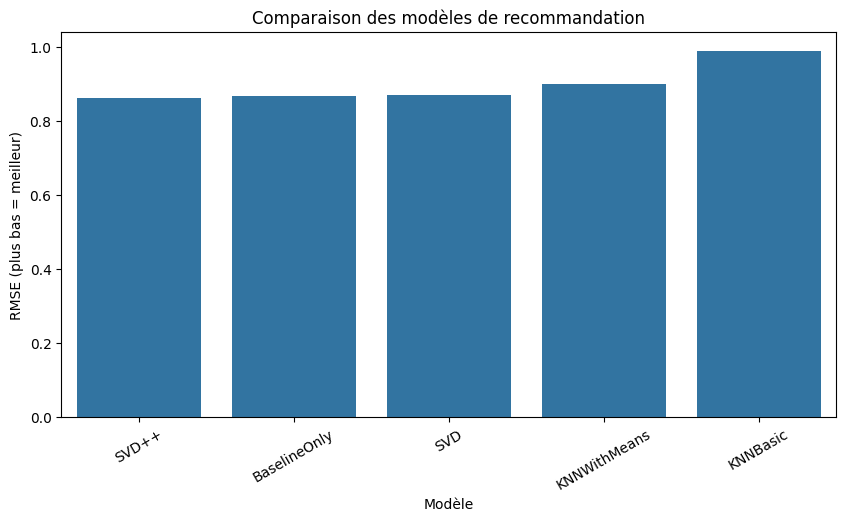

In [37]:
plt.figure(figsize=(10,5))
sns.barplot(x="model", y="rmse", data=results_df)
plt.title("Comparaison des modèles de recommandation")
plt.ylabel("RMSE (plus bas = meilleur)")
plt.xlabel("Modèle")
plt.xticks(rotation=30)
plt.show()


In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.barplot(x="model", y="rmse", data=results_df)
plt.title("Model Comparison (RMSE)")
plt.ylabel("RMSE (lower is better)")
plt.xlabel("Model")
plt.xticks(rotation=30)

plt.tight_layout()
plt.savefig("model_comparison_rmse.png", dpi=300)
plt.close()


In [46]:
import numpy as np
from surprise import Dataset, Reader, accuracy

def evaluate_cold_start(algo, train_df, test_df, user_encoder, movie_encoder, cold_user_frac=0.05, cold_movie_frac=0.05, top_k=5):
    """
    Évalue un modèle sur cold start users / movies et top-k hit rate.
    """
    results = {}
    
    # 1️⃣ Préparer le trainset classique
    reader = Reader(rating_scale=(train_df['rating'].min(), train_df['rating'].max()))
    train_data = Dataset.load_from_df(train_df[['user_idx', 'movie_idx', 'rating']], reader)
    trainset = train_data.build_full_trainset()
    
    # 2️⃣ Préparer le testset classique
    testset = list(zip(test_df['user_idx'], test_df['movie_idx'], test_df['rating']))
    
    # Fit le modèle sur tout le trainset
    algo.fit(trainset)
    predictions = algo.test(testset)
    
    # RMSE et MAE global
    results['rmse_warm'] = accuracy.rmse(predictions, verbose=False)
    results['mae_warm'] = accuracy.mae(predictions, verbose=False)
    
    # ---------------------------
    # Cold start utilisateurs
    # ---------------------------
    cold_users = np.random.choice(train_df['user_idx'].unique(), 
                                  size=int(cold_user_frac * train_df['user_idx'].nunique()), 
                                  replace=False)
    
    cold_user_testset = test_df[test_df['user_idx'].isin(cold_users)]
    if not cold_user_testset.empty:
        testset_cold_users = list(zip(cold_user_testset['user_idx'], cold_user_testset['movie_idx'], cold_user_testset['rating']))
        pred_cold_users = algo.test(testset_cold_users)
        results['rmse_cold_users'] = accuracy.rmse(pred_cold_users, verbose=False)
        results['mae_cold_users'] = accuracy.mae(pred_cold_users, verbose=False)
    
    # ---------------------------
    # Cold start films
    # ---------------------------
    cold_movies = np.random.choice(train_df['movie_idx'].unique(), 
                                   size=int(cold_movie_frac * train_df['movie_idx'].nunique()), 
                                   replace=False)
    
    cold_movie_testset = test_df[test_df['movie_idx'].isin(cold_movies)]
    if not cold_movie_testset.empty:
        testset_cold_movies = list(zip(cold_movie_testset['user_idx'], cold_movie_testset['movie_idx'], cold_movie_testset['rating']))
        pred_cold_movies = algo.test(testset_cold_movies)
        results['rmse_cold_movies'] = accuracy.rmse(pred_cold_movies, verbose=False)
        results['mae_cold_movies'] = accuracy.mae(pred_cold_movies, verbose=False)
    
    # ---------------------------
    # Hit Rate @ top_k (exemple simple)
    # ---------------------------
    hit_count = 0
    total_users = 0
    
    user_ids = test_df['user_idx'].unique()
    for uid in user_ids:
        # Films vus
        movies_watched = train_df[train_df['user_idx']==uid]['movie_idx'].tolist()
        all_movie_idx = list(movie_encoder.transform(movie_encoder.classes_))
        
        # Prédictions pour films non vus
        pred_for_user = [(iid, algo.predict(uid, iid).est) for iid in all_movie_idx if iid not in movies_watched]
        pred_for_user.sort(key=lambda x: x[1], reverse=True)
        top_k_movies = [iid for iid, _ in pred_for_user[:top_k]]
        
        # Hit si un vrai film du test set est dans top_k
        true_movies = test_df[test_df['user_idx']==uid]['movie_idx'].tolist()
        if any(f in top_k_movies for f in true_movies):
            hit_count += 1
        total_users += 1
    
    results['hit_rate_at_5'] = hit_count / total_users
    
    return results


In [48]:
from surprise import BaselineOnly, SVD, SVDpp, KNNBasic, KNNWithMeans

models = {
    "BaselineOnly": BaselineOnly(),
    "KNNBasic": KNNBasic(sim_options={'name':'cosine','user_based':True}),
    "KNNWithMeans": KNNWithMeans(sim_options={'name':'cosine','user_based':True}),
    "SVD": SVD(random_state=42),
    "SVD++": SVDpp(random_state=42)
}


In [49]:
all_results = []

for name, algo in models.items():
    print(f"Évaluation du modèle: {name}")
    res = evaluate_cold_start(
        algo=algo,
        train_df=train_df,
        test_df=test_df,
        user_encoder=user_encoder,
        movie_encoder=movie_encoder
    )
    res['model'] = name
    all_results.append(res)


Évaluation du modèle: BaselineOnly
Estimating biases using als...
Évaluation du modèle: KNNBasic
Computing the cosine similarity matrix...
Done computing similarity matrix.
Évaluation du modèle: KNNWithMeans
Computing the cosine similarity matrix...
Done computing similarity matrix.
Évaluation du modèle: SVD
Évaluation du modèle: SVD++


In [50]:
import pandas as pd

results_df = pd.DataFrame(all_results)

# Trier par RMSE global (warm start)
results_df = results_df.sort_values("rmse_warm").reset_index(drop=True)

results_df


,rmse_warm,mae_warm,rmse_cold_users,mae_cold_users,rmse_cold_movies,mae_cold_movies,hit_rate_at_5,model
0,0.862090,0.659308,0.944638,0.739559,0.862179,0.659022,0.242879,SVD++
1,0.866050,0.666826,0.758763,0.573298,0.893374,0.696854,0.322339,BaselineOnly
2,0.869442,0.667213,0.908827,0.703236,0.869817,0.662346,0.224888,SVD
3,0.898459,0.687901,0.951269,0.715473,0.863493,0.662883,0.013493,KNNWithMeans
4,0.988984,0.765106,0.933427,0.711595,0.994057,0.755873,0.004498,KNNBasic


# Sauvegarder le modèle 

In [57]:
# Sauvegarder le modele 
import os
import pickle

models_dir = os.path.join("..", "models")  # remonter à la racine et aller dans models
os.makedirs(models_dir, exist_ok=True)    # créer le dossier s'il n'existe pas

# Sauvegarder le modèle KNN
with open(os.path.join(models_dir, "knn_model.pkl"), "wb") as f:
    pickle.dump(algo, f)

# Sauvegarder le modèle SVD++
with open(os.path.join(models_dir, "svdpp_model.pkl"), "wb") as f:
    pickle.dump(algo, f)

# Sauvegarder le modèle SVD++
with open(os.path.join(models_dir, "svd_model.pkl"), "wb") as f:
    pickle.dump(algo, f)
    
# Sauvegarder les encoders
with open(os.path.join(models_dir, "user_encoder.pkl"), "wb") as f:
    pickle.dump(user_encoder, f)

with open(os.path.join(models_dir, "movie_encoder.pkl"), "wb") as f:
    pickle.dump(movie_encoder, f)
